# Heart Disease Prediction
 Dataset used: [Heart Disease UCI](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)<br>
 


### Importing the dependencies

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb

from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import metrics

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.ensemble import StackingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy import stats
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

### Data collection

In [ ]:
#loading the csv data to pandas dataframe
heart_data = pd.read_csv('heart.csv')

In [ ]:
#print the first five rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
#print last five rows of the dataset
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


### Exploratory Data Analysis (EDA)

In [ ]:
#number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [ ]:
#getting information about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
#checking for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
#statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


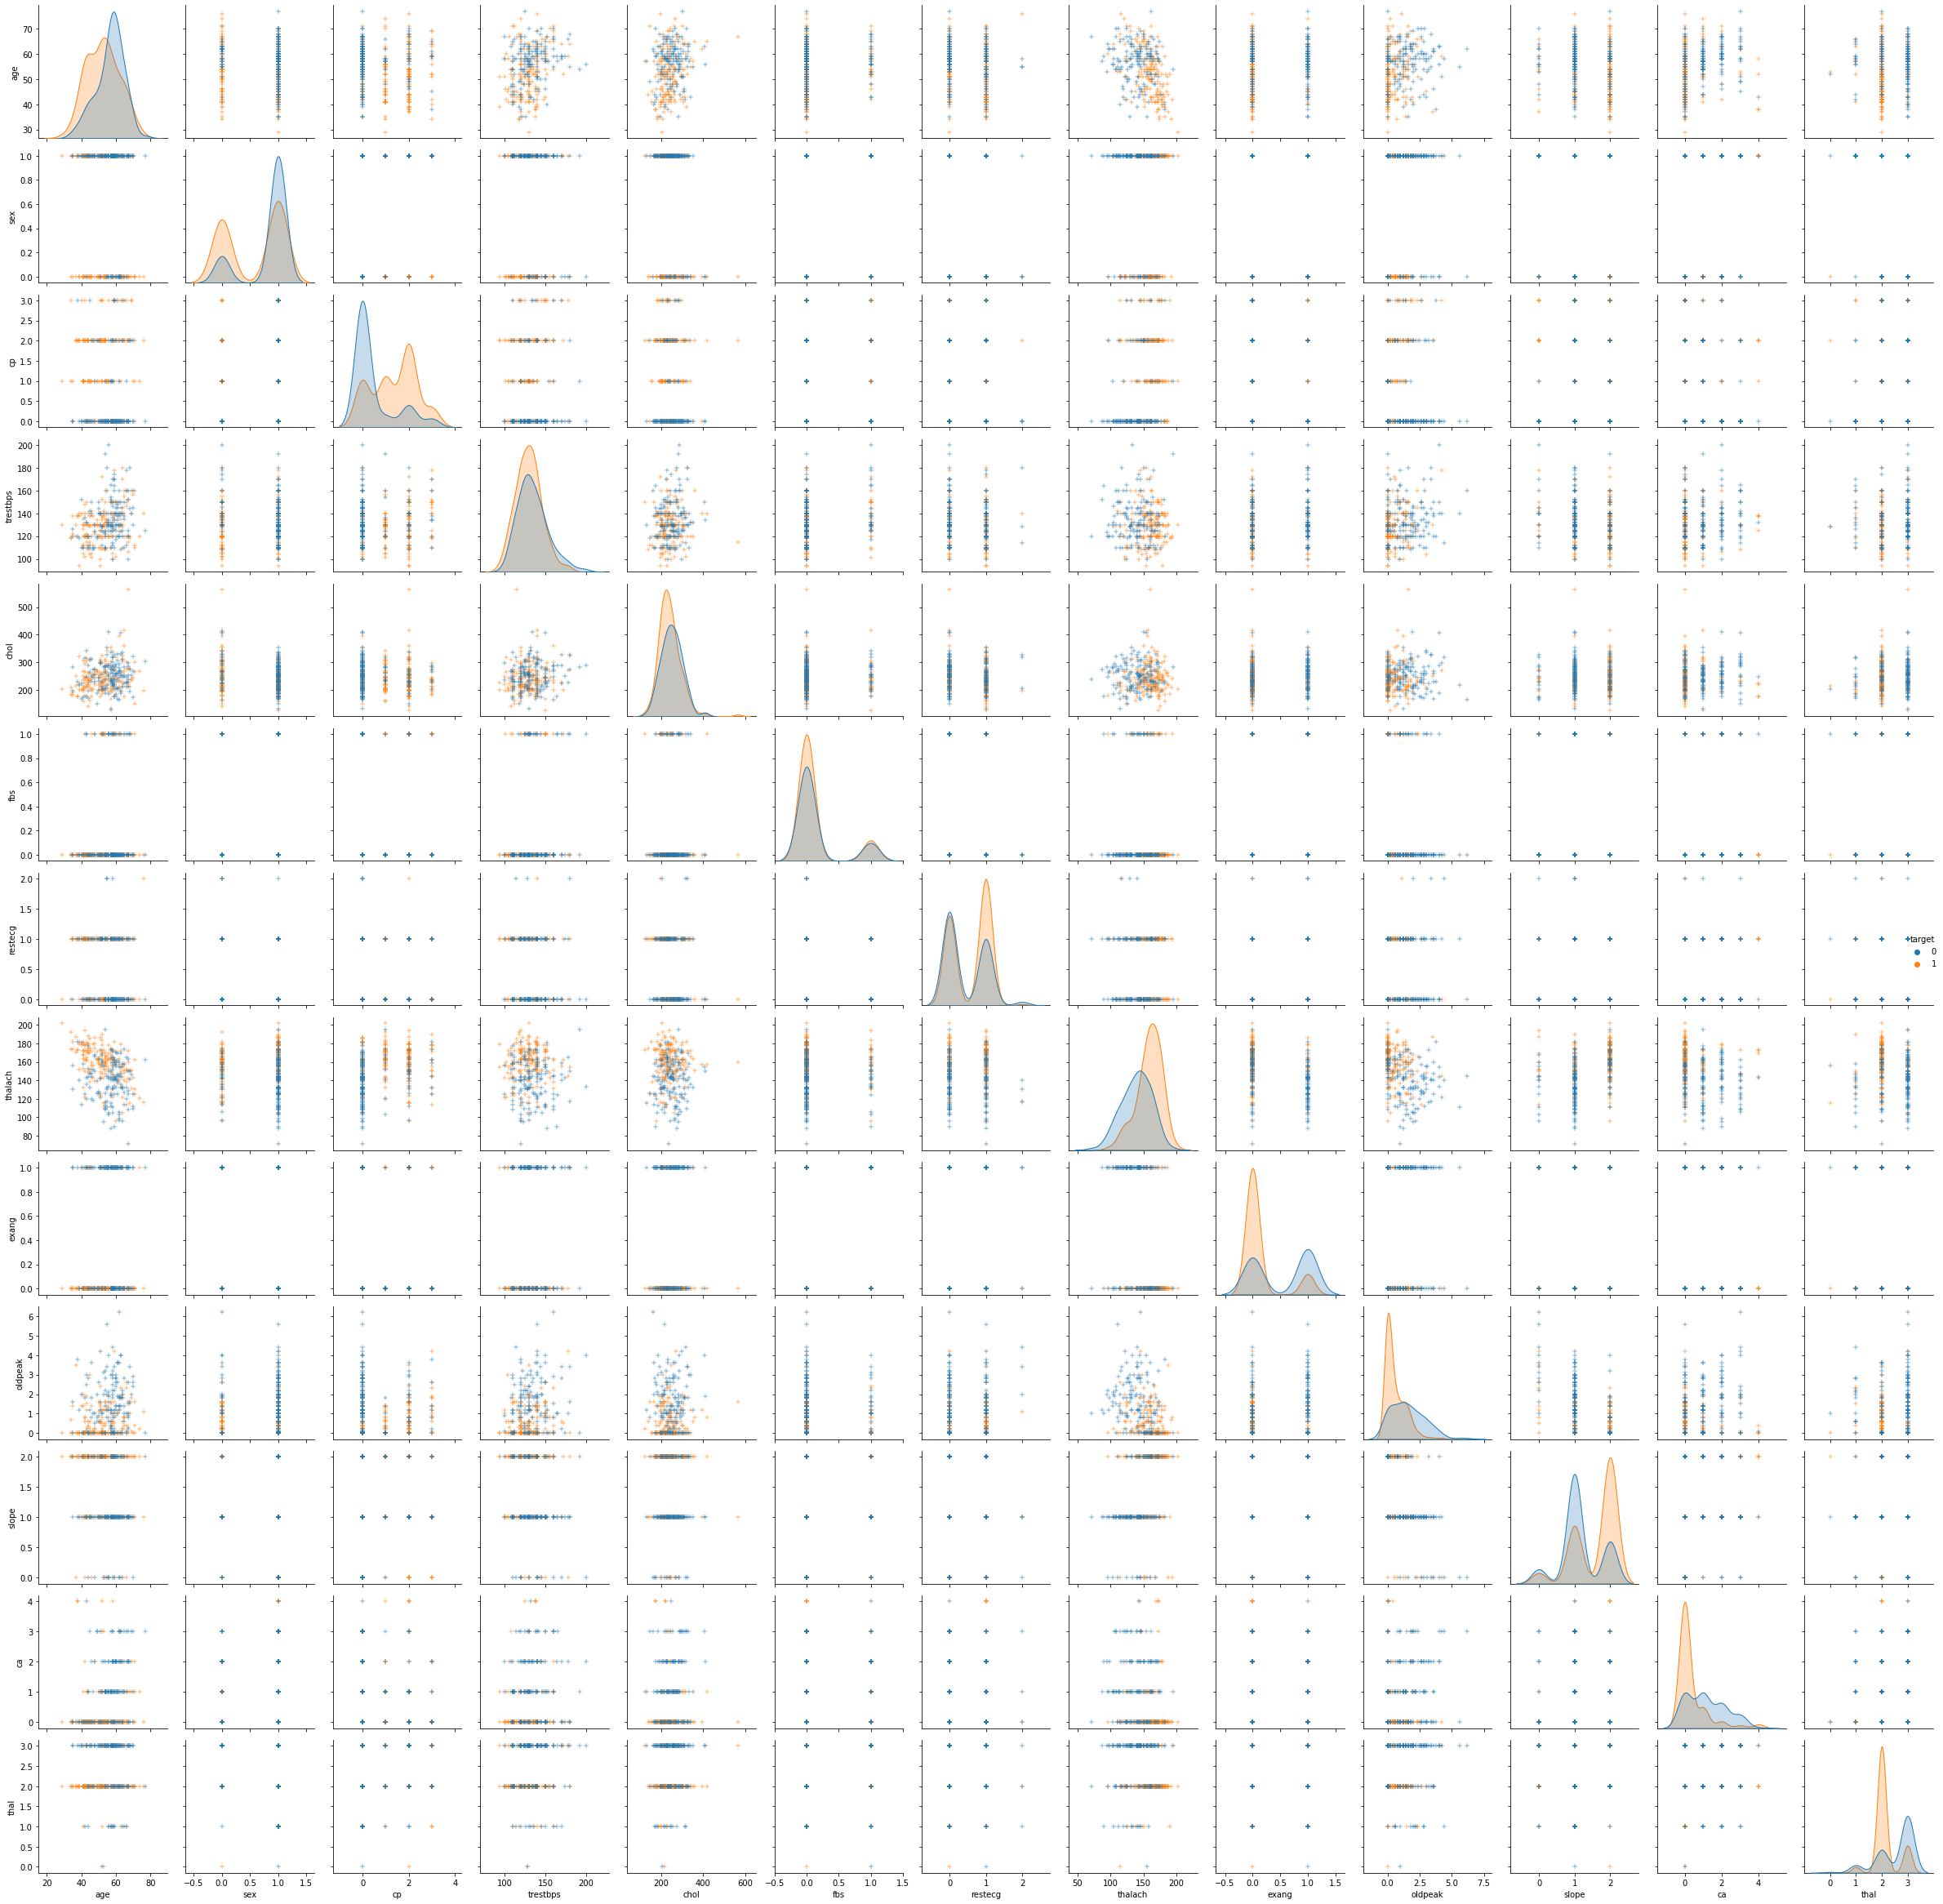

In [ ]:
sb.pairplot(heart_data, hue='target', markers='+')
plt.tight_layout()

In [ ]:
#checking the distribution of target data
heart_data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

1 represents defective heart<br>
0 represents non-defective heart

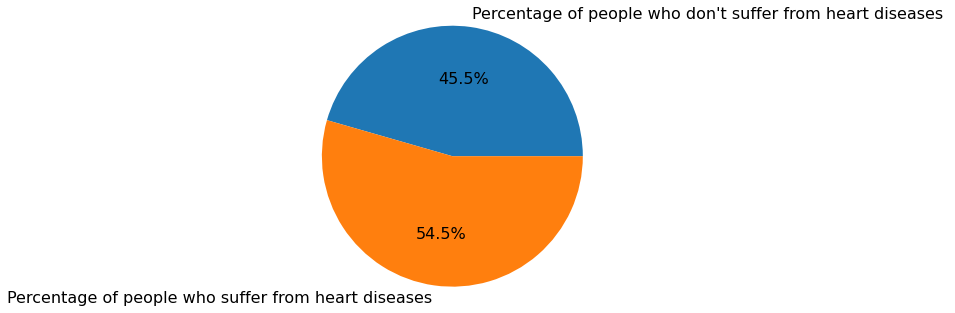

In [ ]:
data_target = heart_data.groupby("target").size()
plt.pie(data_target.values, labels = ["Percentage of people who don't suffer from heart diseases", "Percentage of people who suffer from heart diseases"] , autopct='%1.1f%%', radius = 1.5, textprops = {"fontsize" : 16}) 
plt.show()

Inference: Over 50% of people was diagnosed with heart disease.

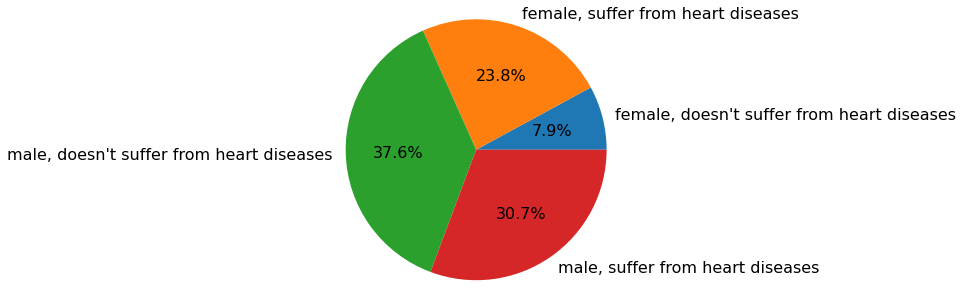

In [ ]:
heart_data_sex = heart_data.groupby(["sex","target"]).size()
plt.pie(heart_data_sex.values, labels = ["female, doesn't suffer from heart diseases", "female, suffer from heart diseases", "male, doesn't suffer from heart diseases", "male, suffer from heart diseases"],autopct='%1.1f%%',radius = 1.5, textprops = {"fontsize" : 16})
plt.show()

Inference: The ratio of male who suffers from heart diseases is slightly greater than that of females.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


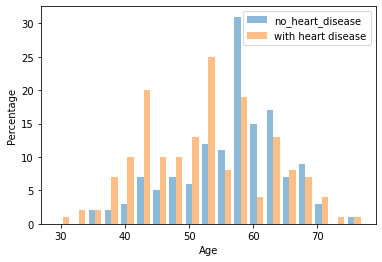

In [ ]:
plt.hist([heart_data[heart_data.target==0].age, heart_data[heart_data.target==1].age], bins = 19, alpha =0.5, align='mid',histtype = "bar", orientation='vertical', label = ["no_heart_disease","with heart disease"])
plt.xlabel("Age")
plt.ylabel("Percentage")
plt.legend()
plt.show()

Inference: People over the age of 40 have higher risk of suffering from heart diseases.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


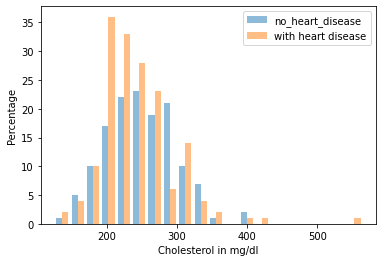

In [ ]:
plt.hist([heart_data[heart_data.target==0].chol, heart_data[heart_data.target==1].chol], bins = 20, alpha = 0.5, label = ["no_heart_disease","with heart disease"])
plt.xlabel("Cholesterol in mg/dl")
plt.ylabel("Percentage")
plt.legend()
plt.show()

Inference: People having heart disease have cholesterol levels over 200mg/dl.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


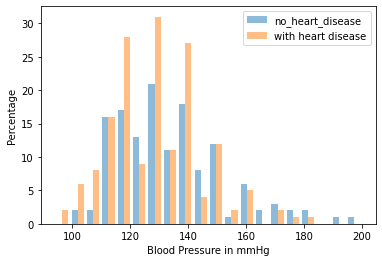

In [ ]:
plt.hist([heart_data[heart_data.target==0].trestbps, heart_data[heart_data.target==1].trestbps], bins = 20, alpha = 0.5, label = ["no_heart_disease","with heart disease"])
plt.xlabel("Blood Pressure in mmHg")
plt.ylabel("Percentage")
plt.legend()
plt.show()

Inference: Over 50% of the patients have higher blood pressure (more than 120 mmHg) irrespective of whether they have heart disease or not.

Splitting the Features and Target

In [ ]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [ ]:
print(X)

     age  sex  cp  trestbps  chol  ...  exang  oldpeak  slope  ca  thal
0     63    1   3       145   233  ...      0      2.3      0   0     1
1     37    1   2       130   250  ...      0      3.5      0   0     2
2     41    0   1       130   204  ...      0      1.4      2   0     2
3     56    1   1       120   236  ...      0      0.8      2   0     2
4     57    0   0       120   354  ...      1      0.6      2   0     2
..   ...  ...  ..       ...   ...  ...    ...      ...    ...  ..   ...
298   57    0   0       140   241  ...      1      0.2      1   0     3
299   45    1   3       110   264  ...      0      1.2      1   0     3
300   68    1   0       144   193  ...      0      3.4      1   2     3
301   57    1   0       130   131  ...      1      1.2      1   1     3
302   57    0   1       130   236  ...      0      0.0      1   1     2

[303 rows x 13 columns]


In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


Splitting the Data into Training data & Test Data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


### Model Training

Using the Logistic Regression model

In [ ]:
model_lr = LogisticRegression(max_iter=1000)

#training Logistic Regression model with training data
model_lr.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

Printing logistic regression model accuracy on training data

In [ ]:
#accuracy on training data
X_train_prediction_lr = model_lr.predict(X_train)
training_data_accuracy_lr = accuracy_score(X_train_prediction_lr, Y_train)

In [ ]:
print('Logistic Regression - Accuracy on Training data : ', training_data_accuracy_lr)

Logistic Regression - Accuracy on Training data :  0.8553719008264463


In [ ]:
#accuracy on test data
X_test_prediction_lr = model_lr.predict(X_test)
test_data_accuracy_lr = accuracy_score(X_test_prediction_lr, Y_test)

Logistic Regression - Accuracy on Test data :  0.8032786885245902

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.79      0.79        28
           1       0.82      0.82      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61


Confusion Matrix:


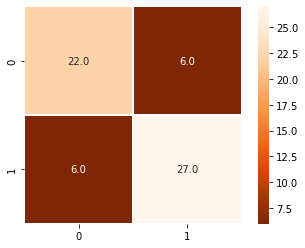

In [ ]:
print('Logistic Regression - Accuracy on Test data : ', test_data_accuracy_lr)
print('\nClassification Report:')
print(classification_report(X_test_prediction_lr, Y_test))
print('\nConfusion Matrix:')
sb.heatmap(metrics.confusion_matrix(X_test_prediction_lr, Y_test), annot=True, fmt=".1f", linewidths=.90, square = True, cmap = 'Oranges_r')

In [ ]:
test_score= test_data_accuracy_lr *100
train_score =training_data_accuracy_lr*100
results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.53719,80.327869


Predictions based on Logistic Regression model

In [ ]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

#change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

#reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model_lr.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('\n\nUsing Logistic Reg model - The Person does not have a Heart Disease\n\n')
else:
  print('\n\nUsing Logistic Reg model - The Person has Heart Disease\n\n')

[0]


Using Logistic Reg model - The Person does not have a Heart Disease




/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


Now, we check for Random Forest model

In [ ]:
#Make a RF model with 1000 trees
model_rf = RandomForestClassifier(random_state = 0, n_estimators = 1000)

#Train the RF model
model_rf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=1000, random_state=0)

In [ ]:
#RF accuracy on training data
X_train_prediction_rf = model_rf.predict(X_train)
training_data_accuracy_rf= accuracy_score(X_train_prediction_rf, Y_train)

Print accuracy of RF model on training data

In [ ]:
print('Random Forest - Accuracy on Training data : ', training_data_accuracy_rf)

Random Forest - Accuracy on Training data :  1.0


Now train using the test data

In [ ]:
#RF accuracy on test data
X_test_prediction_rf = model_rf.predict(X_test)
test_data_accuracy_rf = accuracy_score(X_test_prediction_rf, Y_test)

Random Forest - Accuracy on Test data :  0.7704918032786885

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.73      0.76        30
           1       0.76      0.81      0.78        31

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61


Confusion Matrix:


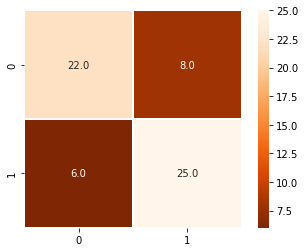

In [ ]:
print('Random Forest - Accuracy on Test data : ', test_data_accuracy_rf)
print('\nClassification Report:')
print(classification_report(X_test_prediction_rf, Y_test))
print('\nConfusion Matrix:')
sb.heatmap(metrics.confusion_matrix(X_test_prediction_rf, Y_test), annot=True, fmt=".1f", linewidths=.90, square = True, cmap = 'Oranges_r')

In [ ]:
test_score = test_data_accuracy_rf*100
train_score =training_data_accuracy_rf*100
results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.53719,80.327869
1,Random Forest Classifier,100.00000,77.049180


Check predictions based on the RF model

In [ ]:
prediction_rf = model_rf.predict(input_data_reshaped)
print(prediction_rf)

if (prediction_rf[0]== 0):
  print('\n\nUsing Random Forest model - The Person does not have a Heart Disease\n\n')
else:
  print('\n\nUsing Random Forest model - The Person has Heart Disease\n\n')

[0]


Using Random Forest model - The Person does not have a Heart Disease




/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


Using the SVM Model next

In [ ]:
#Instantize a SVM classifier with linear kernel
model_svm = svm.SVC(kernel='linear') 

#Let's train the model using the same dataset as before
model_svm.fit(X_train, Y_train)

SVC(kernel='linear')

Test the SVM model and find its accuracy

In [ ]:
#Find the SVM model accuracy
X_train_prediction_svm = model_svm.predict(X_train)
training_data_accuracy_svm = accuracy_score(X_train_prediction_svm, Y_train)

Printing SVM accuracy

In [ ]:
print('SVM - Accuracy on Training data : ', training_data_accuracy_svm)

SVM - Accuracy on Training data :  0.8553719008264463


SVM on test data

In [ ]:
#SVM accuracy on test data
X_test_prediction_svm = model_svm.predict(X_test)
test_data_accuracy_svm = accuracy_score(X_test_prediction_svm, Y_test)

SVM - Accuracy on Test data :  0.819672131147541

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.84      0.79        25
           1       0.88      0.81      0.84        36

    accuracy                           0.82        61
   macro avg       0.81      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61


Confusion Matrix:


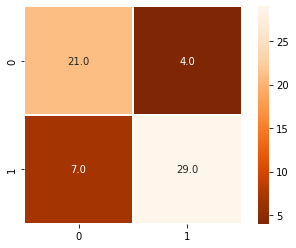

In [ ]:
print('SVM - Accuracy on Test data : ',test_data_accuracy_svm)
print('\nClassification Report:')
print(classification_report(X_test_prediction_svm, Y_test))
print('\nConfusion Matrix:')
sb.heatmap(metrics.confusion_matrix(X_test_prediction_svm, Y_test), annot=True, fmt=".1f", linewidths=.90, square = True, cmap = 'Oranges_r')

In [ ]:
test_score = test_data_accuracy_svm*100
train_score =training_data_accuracy_svm*100
results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.53719,80.327869
1,Random Forest Classifier,100.00000,77.049180
2,Support Vector Machine,85.53719,81.967213


Using SVM model, let's predict with the same input data as before

In [ ]:
prediction_svm = model_svm.predict(input_data_reshaped)
print(prediction_svm)

if (prediction_svm[0]== 0):
  print('\n\nUsing SVM  model - The Person does not have a Heart Disease\n\n')
else:
  print('\n\nUsing SVM model - The Person has Heart Disease\n\n')

[0]


Using SVM  model - The Person does not have a Heart Disease




/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


Using Decision Tree Classifier

In [ ]:
model_dt = DecisionTreeClassifier(random_state=42)
#training the model
model_dt.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

Testing the model and finding the accuracy

In [ ]:
X_train_prediction_dt = model_dt.predict(X_train)
training_data_accuracy_dt = accuracy_score(X_train_prediction_dt, Y_train)

Accuracy for decision tree model 

In [ ]:
print('Decision Tree - Accuracy on Training data : ', training_data_accuracy_dt)

Decision Tree - Accuracy on Training data :  1.0


Now for test data

In [ ]:
#decision tree accuracy on test data
X_test_prediction_dt = model_dt.predict(X_test)
test_data_accuracy_dt = accuracy_score(X_test_prediction_dt, Y_test)

Decision Tree - Accuracy on Test data :  0.7868852459016393

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.78      0.76        27
           1       0.82      0.79      0.81        34

    accuracy                           0.79        61
   macro avg       0.78      0.79      0.78        61
weighted avg       0.79      0.79      0.79        61


Confusion Matrix:


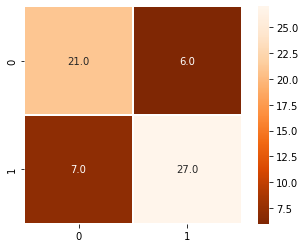

In [ ]:
print('Decision Tree - Accuracy on Test data : ',test_data_accuracy_dt)
print('\nClassification Report:')
print(classification_report(X_test_prediction_dt, Y_test))
print('\nConfusion Matrix:')
sb.heatmap(metrics.confusion_matrix(X_test_prediction_dt, Y_test), annot=True, fmt=".1f", linewidths=.90, square = True, cmap = 'Oranges_r')

In [ ]:
test_score = test_data_accuracy_dt*100
train_score =training_data_accuracy_dt*100
results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.53719,80.327869
1,Random Forest Classifier,100.00000,77.049180
2,Support Vector Machine,85.53719,81.967213
3,Decision Tree Classifier,100.00000,78.688525


Checking predictions using Decision tree model

In [ ]:
prediction_dt = model_dt.predict(input_data_reshaped)
print(prediction_dt)

if (prediction_dt[0]== 0):
  print('\n\nUsing Decision tree Classifier  - The Person does not have a Heart Disease\n\n')
else:
  print('\n\nUsing Decision tree Classifier - The Person has Heart Disease\n\n')

[0]


Using Decision tree Classifier  - The Person does not have a Heart Disease




/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


XGBoost Classifier

In [ ]:
model_xgb = XGBClassifier(use_label_encoder=False)
model_xgb.fit(X_train, Y_train)

XGBClassifier(use_label_encoder=False)

In [ ]:
#test model and get accuracy
X_train_prediction_xgb = model_xgb.predict(X_train)
training_data_accuracy_xgb = accuracy_score(X_train_prediction_xgb, Y_train)

Print accuracy of XGBoost Classifer on training data

In [ ]:
print('SVM - Accuracy on Training data : ', training_data_accuracy_xgb)

SVM - Accuracy on Training data :  0.987603305785124


In [ ]:
#SVM accuracy on test data
X_test_prediction_xgb= model_xgb.predict(X_test)
test_data_accuracy_xgb = accuracy_score(X_test_prediction_xgb, Y_test)

XGBoost - Accuracy on Test data :  0.7540983606557377

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.72      0.74        29
           1       0.76      0.78      0.77        32

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61


Confusion Matrix:


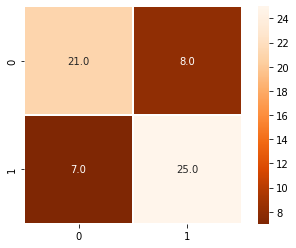

In [ ]:
print('XGBoost - Accuracy on Test data : ',test_data_accuracy_xgb)
print('\nClassification Report:')
print(classification_report(X_test_prediction_xgb, Y_test))
print('\nConfusion Matrix:')
sb.heatmap(metrics.confusion_matrix(X_test_prediction_xgb, Y_test), annot=True, fmt=".1f", linewidths=.90, square = True, cmap = 'Oranges_r')

In [ ]:
test_score = test_data_accuracy_xgb*100
train_score =training_data_accuracy_xgb*100
results_df_2 = pd.DataFrame(data=[["XGBoost Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.537190,80.327869
1,Random Forest Classifier,100.000000,77.049180
2,Support Vector Machine,85.537190,81.967213
3,Decision Tree Classifier,100.000000,78.688525
4,XGBoost Classifier,98.760331,75.409836


Making Predictions using XGBoost Classifier

In [ ]:
prediction_xgb = model_xgb.predict(input_data_reshaped)
print(prediction_xgb)

if (prediction_xgb[0]== 0):
  print('\n\nUsing XGBoost Classifier  - The Person does not have a Heart Disease\n\n')
else:
  print('\n\nUsing XGBoost Classifier - The Person has Heart Disease\n\n')

In [ ]:
models_test_acc = [test_data_accuracy_lr, test_data_accuracy_rf,test_data_accuracy_svm,test_data_accuracy_dt,test_data_accuracy_xgb]
accuracy_scores = []
for model in models_test_acc:
  accuracy_scores.append(model)
print(accuracy_scores)

[0.8032786885245902, 0.7704918032786885, 0.819672131147541, 0.7868852459016393, 0.7540983606557377]


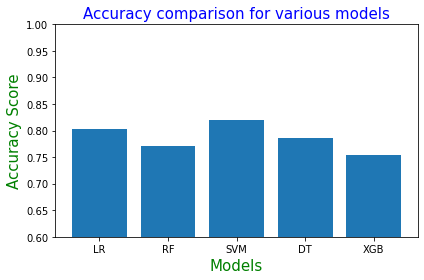

In [ ]:
plt.bar(['LR','RF','SVM','DT','XGB'],accuracy_scores)
plt.ylim(0.6,1.0)
plt.title('Accuracy comparison for various models',fontsize =15, color='b')
plt.xlabel('Models',fontsize =15,color='g')
plt.ylabel('Accuracy Score',fontsize =15,color='g')
plt.tight_layout()
plt.show()

Inference: It is clear from the barplot that SVM shows the highest accuracy score.

### Models Hyperparameter Tuning

Logistic Regression Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {"C": np.logspace(-4, 4, 20),"solver": ["liblinear"]}

lr_clf = LogisticRegression()
lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
lr_cv.fit(X_train, Y_train)
best_params = lr_cv.best_params_
print("Best parameters: ",best_params)

lr_clf = LogisticRegression(**best_params)
lr_clf.fit(X_train, Y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters:  {'C': 0.23357214690901212, 'solver': 'liblinear'}


LogisticRegression(C=0.23357214690901212, solver='liblinear')

In [ ]:
#accuracy on training data
pred = lr_clf.predict(X_train)
print('Logistic Regression Hyperparameter Tuning - Accuracy on Training data : ', accuracy_score(Y_train, pred))

Logistic Regression Hyperparameter Tuning - Accuracy on Training data :  0.8471074380165289


Logistic Regression Hyperparameter Tuning - Accuracy on Testing data :  0.8360655737704918

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        28
           1       0.85      0.85      0.85        33

    accuracy                           0.84        61
   macro avg       0.83      0.83      0.83        61
weighted avg       0.84      0.84      0.84        61


Confusion Matrix:


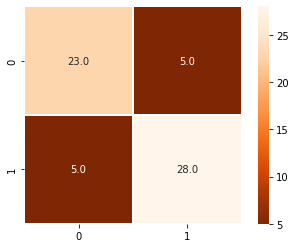

In [ ]:
#accuracy on test data
pred = lr_clf.predict(X_test)
print('Logistic Regression Hyperparameter Tuning - Accuracy on Testing data : ', accuracy_score(Y_test, pred))
print('\nClassification Report:')
print(classification_report(Y_test, pred))
print('\nConfusion Matrix:')
sb.heatmap(metrics.confusion_matrix(Y_test, pred), annot=True, fmt=".1f", linewidths=.90, square = True, cmap = 'Oranges_r')

In [ ]:
test_score = accuracy_score(Y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(Y_train, lr_clf.predict(X_train)) * 100

tuning_results_df = pd.DataFrame(data=[["Tuned Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,84.710744,83.606557


Random Forest Hyperparameter Tuning

In [ ]:
n_estimators = [500, 900, 1100, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5, 10, 15, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

params_grid = {
    'n_estimators': n_estimators, 
    'max_features': max_features,
    'max_depth': max_depth, 
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
              }

rf_clf = RandomForestClassifier(random_state=42)
rf_cv = GridSearchCV(rf_clf, params_grid, scoring="accuracy", cv=3, verbose=1, n_jobs=-1)
rf_cv.fit(X_train, Y_train)
best_params = rf_cv.best_params_
print("Best parameters: ",best_params)

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, Y_train)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Best parameters:  {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 900}


RandomForestClassifier(max_depth=2, n_estimators=900)

In [ ]:
#accuracy on training data
pred = rf_clf.predict(X_train)
print('Random Forest Hyperparameter Tuning - Accuracy on Training data : ', accuracy_score(Y_train, pred))

Random Forest Hyperparameter Tuning - Accuracy on Training data :  0.8760330578512396


Random Forest Hyperparameter Tuning - Accuracy on Testing data :  0.7704918032786885

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.71      0.74        28
           1       0.77      0.82      0.79        33

    accuracy                           0.77        61
   macro avg       0.77      0.77      0.77        61
weighted avg       0.77      0.77      0.77        61


Confusion Matrix:


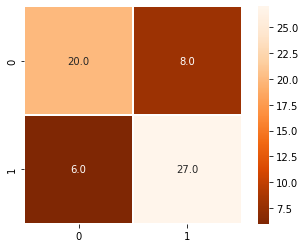

In [ ]:
#accuracy on test data
pred = rf_clf.predict(X_test)
print('Random Forest Hyperparameter Tuning - Accuracy on Testing data : ', accuracy_score(Y_test, pred))
print('\nClassification Report:')
print(classification_report(Y_test, pred))
print('\nConfusion Matrix:')
sb.heatmap(metrics.confusion_matrix(Y_test, pred), annot=True, fmt=".1f", linewidths=.90, square = True, cmap = 'Oranges_r')

In [ ]:
test_score = accuracy_score(Y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(Y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,84.710744,83.606557
1,Tuned Random Forest Classifier,87.603306,77.049180


SVM Hyperparameter Tuning

In [ ]:
svm_clf = svm.SVC(kernel='rbf', gamma=0.1, C=1.0)

params = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
svm_cv = GridSearchCV(svm_clf, params, refit = True, verbose = 3)
svm_cv.fit(X_train, Y_train)
best_params = svm_cv.best_params_
print("Best parameters: ",best_params)

svm_clf = svm.SVC(**best_params)
svm_clf.fit(X_train, Y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.551 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.551 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.542 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.542 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.542 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.551 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.551 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.542 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.542 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.542 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.551 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

SVC(C=100, gamma=0.0001)

In [ ]:
#accuracy on training data
pred = svm_clf.predict(X_train)
print('SVM Hyperparameter Tuning - Accuracy on Training data : ', accuracy_score(Y_train, pred))

SVM Hyperparameter Tuning - Accuracy on Training data :  0.8471074380165289


SVM Hyperparameter Tuning - Accuracy on Testing data :  0.7377049180327869

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.82      0.74        28
           1       0.81      0.67      0.73        33

    accuracy                           0.74        61
   macro avg       0.75      0.74      0.74        61
weighted avg       0.75      0.74      0.74        61


Confusion Matrix:


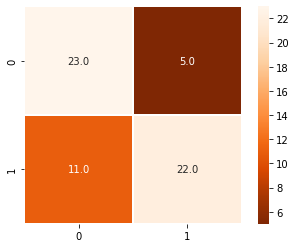

In [ ]:
#accuracy on test data
pred = svm_clf.predict(X_test)
print('SVM Hyperparameter Tuning - Accuracy on Testing data : ', accuracy_score(Y_test, pred))
print('\nClassification Report:')
print(classification_report(Y_test, pred))
print('\nConfusion Matrix:')
sb.heatmap(metrics.confusion_matrix(Y_test, pred), annot=True, fmt=".1f", linewidths=.90, square = True, cmap = 'Oranges_r')

In [ ]:
test_score = accuracy_score(Y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(Y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,84.710744,83.606557
1,Tuned Random Forest Classifier,87.603306,77.049180
2,Tuned Support Vector Machine,84.710744,73.770492


Decision Tree Hyperparameter Tuning

In [ ]:
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, Y_train)
best_params = tree_cv.best_params_
print("Best parameters: ",best_params)

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, Y_train)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best parameters:  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 2, 'splitter': 'random'}


DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=8,
                       splitter='random')

In [ ]:
#accuracy on training data
pred = tree_clf.predict(X_train)
print('Decision Tree Hyperparameter Tuning - Accuracy on Training data : ', accuracy_score(Y_train, pred))

Decision Tree Hyperparameter Tuning - Accuracy on Training data :  0.859504132231405


Decision Tree Hyperparameter Tuning - Accuracy on Testing data :  0.7540983606557377

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.71      0.73        28
           1       0.76      0.79      0.78        33

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61


Confusion Matrix:


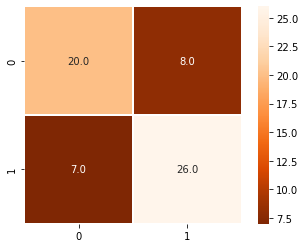

In [ ]:
#accuracy on test data
pred = tree_clf.predict(X_test)
print('Decision Tree Hyperparameter Tuning - Accuracy on Testing data : ', accuracy_score(Y_test, pred))
print('\nClassification Report:')
print(classification_report(Y_test, pred))
print('\nConfusion Matrix:')
sb.heatmap(metrics.confusion_matrix(Y_test, pred), annot=True, fmt=".1f", linewidths=.90, square = True, cmap = 'Oranges_r')

In [ ]:
test_score = accuracy_score(Y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(Y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,84.710744,83.606557
1,Tuned Random Forest Classifier,87.603306,77.049180
2,Tuned Support Vector Machine,84.710744,73.770492
3,Tuned Decision Tree Classifier,85.950413,75.409836


XGBoost Classifier Hyperparameter Tuning

In [ ]:
param_grid = dict(
    n_estimators=stats.randint(10, 1000),
    max_depth=stats.randint(1, 10),
    learning_rate=stats.uniform(0, 1)
)

xgb_clf = XGBClassifier(use_label_encoder=False)
xgb_cv = RandomizedSearchCV(
    xgb_clf, param_grid, cv=3, n_iter=50, 
    scoring='accuracy', n_jobs=-1, verbose=1
)
xgb_cv.fit(X_train, Y_train)
best_params = xgb_cv.best_params_
print("Best parameters: ",best_params)

xgb_clf = XGBClassifier(**best_params)
xgb_clf.fit(X_train, Y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters:  {'learning_rate': 0.2818767459340139, 'max_depth': 7, 'n_estimators': 301}


XGBClassifier(learning_rate=0.2818767459340139, max_depth=7, n_estimators=301)

In [ ]:
#accuracy on training data
pred = tree_clf.predict(X_train)
print('XGBoost Hyperparameter Tuning - Accuracy on Training data : ', accuracy_score(Y_train, pred))

XGBoost Hyperparameter Tuning - Accuracy on Training data :  0.859504132231405


XGBoost Hyperparameter Tuning - Accuracy on Testing data :  0.7540983606557377

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.71      0.73        28
           1       0.76      0.79      0.78        33

    accuracy                           0.75        61
   macro avg       0.75      0.75      0.75        61
weighted avg       0.75      0.75      0.75        61


Confusion Matrix:


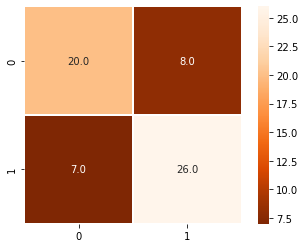

In [ ]:
#accuracy on test data
pred = tree_clf.predict(X_test)
print('XGBoost Hyperparameter Tuning - Accuracy on Testing data : ', accuracy_score(Y_test, pred))
print('\nClassification Report:')
print(classification_report(Y_test, pred))
print('\nConfusion Matrix:')
sb.heatmap(metrics.confusion_matrix(Y_test, pred), annot=True, fmt=".1f", linewidths=.90, square = True, cmap = 'Oranges_r')

In [ ]:
test_score = accuracy_score(Y_test, xgb_clf.predict(X_test)) * 100
train_score = accuracy_score(Y_train, xgb_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Tuned XGBoost Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,84.710744,83.606557
1,Tuned Random Forest Classifier,87.603306,77.049180
2,Tuned Support Vector Machine,84.710744,73.770492
3,Tuned Decision Tree Classifier,85.950413,75.409836
4,Tuned XGBoost Classifier,100.000000,75.409836


Inference: The results don't improve much after hyperparameter tuning, probably because the dataset is small.

Let's try to Stack the ML models together and check:

First, lets apply kfold with k=10 to the data

In [ ]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle=True,random_state=10)

for train_index, test_index in kfold.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

In [ ]:
y_train

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 273, dtype: int64

With the kfold input, now we can use stacking with logistic regression, random forest and svm and then use Knn as the final estimator

In [ ]:
models = list()
models.append(('logreg', model_lr))
models.append(('rf', model_rf))
models.append(('svm', model_svm))

stackedmodel = StackingClassifier(estimators=models, final_estimator=KNeighborsClassifier(n_neighbors=7))
stackedmodel.fit(X_train, y_train)
y_predicted = stackedmodel.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Text(0.5, 1.0, 'Accuracy Score: 0.9')

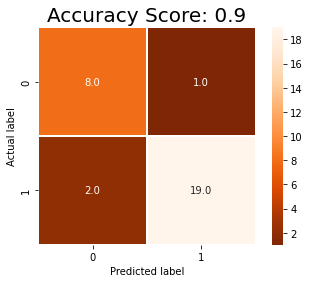

In [ ]:
sb.heatmap(metrics.confusion_matrix(y_test,y_predicted), annot=True, fmt=".1f", linewidths=.90, square = True, cmap = 'Oranges_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(y_test, y_predicted))
plt.title(all_sample_title, size = 20)

Inference: Stacking Ensemble provides an accuracy score of 90% when using KFold along with Stacking, which is better since it is greater than the individual accuracy scores of other ML models.